In [7]:

import yfinance as yf
import datetime as dt
import pandas as pd #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt #visialization
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import plotly.graph_objects as go #candlestick charts

import warnings as wr
wr.filterwarnings('ignore')

In [10]:
# def get_stock_data(ticker, start_date, end_date):
#     try:
#         # Download historical stock data
#         stock_data = yf.download(ticker, start=start_date, end=end_date)
#         return stock_data
#     except Exception as e:
#         print(f"Error fetching data for {ticker}: {e}")
#         return None


# List of stock tickers (37 Auto Manafactures)
tickers = ['ARVL', 'AYRO', 'BLBD', 'CENN', 'CJET', 'ECDA', 'EGOX', 'EVTV', 'F', 'FFIE',
           'FSR', 'GM', 'GOEV', 'GP', 'HMC', 'HYZN', 'LCID', 'LI', 'LVWR', 'MULN',
           'NIO', 'NIU', 'PEV', 'PSNY', 'RACE', 'RIVN', 'SOLO', 'STLA', 'TM', 'TSLA',
           'VEV', 'VFS', 'VLCN', 'WKHS', 'XPEV', 'ZAPP']

# Define the time period for historical data  (Historical Prices and the frequencey is Daily)
start_date = dt.datetime(2023,1,1)  # Replace with the desired start date (y-m-d)
end_date = dt.datetime(2024,1,1)    # Replace with the desired end date (y-m-d)


# Create an empty DataFrame to store the stock data
df = pd.DataFrame()

# Fetch historical data for each ticker and append to the DataFrame
for ticker in tickers:
    stock_data = yf.download(ticker, start_date, end_date)
    stock_data['Ticker'] = ticker  # Add a column for the ticker symbol
    df = pd.concat([df, stock_data])

# Convert the 'Date' column to a string format
df['Date'] = df.index.strftime('%Y-%m-%d')

# Display the combined DataFrame
print("Combined Stock Data:")
print(df.head(5))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Combined Stock Data:
             Open  High    Low  Close  Adj Close  Volume Ticker        Date
Date                                                                       
2023-01-03   9.00   9.9   8.40   8.95       8.95  185046   ARVL  2023-01-03
2023-01-04   9.75  11.6   9.00  11.60      11.60  178766   ARVL  2023-01-04
2023-01-05  11.85  12.0  10.30  10.70      10.70  145310   ARVL  2023-01-05
2023-01-06  10.40  10.8   9.75  10.00      10.00  104930   ARVL  2023-01-06
2023-01-09  10.65  11.0  10.25  10.60      10.60   80312   ARVL  2023-01-09


In [11]:
# Save the dataframe to a CSV file
excel_file_path = 'stock_data.xlsx'
df.to_csv('stock_data.csv', index=False)
# df.to_excel(excel_file_path, index=False)

print(f"\nData Frame saved to {stock_data}")


Data Frame saved to               Open    High     Low   Close  Adj Close  Volume Ticker
Date                                                                
2023-01-03  10.180  10.200  10.180  10.190     10.190  125300   ZAPP
2023-01-04  10.190  10.220  10.190  10.200     10.200  138000   ZAPP
2023-01-05  10.220  10.220  10.220  10.220     10.220   78100   ZAPP
2023-01-06  10.200  10.220  10.200  10.220     10.220   11100   ZAPP
2023-01-09  10.230  10.230  10.210  10.220     10.220  128900   ZAPP
...            ...     ...     ...     ...        ...     ...    ...
2023-12-22   0.250   0.280   0.245   0.263      0.263   75500   ZAPP
2023-12-26   0.290   0.290   0.264   0.276      0.276   45700   ZAPP
2023-12-27   0.290   0.300   0.267   0.272      0.272  132700   ZAPP
2023-12-28   0.273   0.299   0.260   0.276      0.276   72500   ZAPP
2023-12-29   0.289   0.299   0.264   0.264      0.264   89800   ZAPP

[250 rows x 7 columns]


In [26]:
# shape of the data
df.shape


(8645, 8)

In [27]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8645 entries, 2023-01-03 to 2023-12-29
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8645 non-null   float64
 1   High       8645 non-null   float64
 2   Low        8645 non-null   float64
 3   Close      8645 non-null   float64
 4   Adj Close  8645 non-null   float64
 5   Volume     8645 non-null   int64  
 6   Ticker     8645 non-null   object 
 7   Date       8645 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 607.9+ KB


In [28]:
#describing the data
df.describe()

Open          High          Low        Close    Adj Close  \
count  8645.000000   8645.000000  8645.000000  8645.000000  8645.000000   
mean     81.802692     85.321455    77.778142    80.761147    80.715844   
std     559.547295    594.080173   524.783311   552.991896   552.989865   
min       0.074000      0.080000     0.066000     0.073000     0.073000   
25%       2.070000      2.150000     1.980000     2.050000     2.050000   
50%       7.860000      8.160000     7.580000     7.880000     7.880000   
75%      21.780001     22.480000    21.100000    21.760000    21.760000   
max    9675.000000  10800.000000  9225.000000  9450.000000  9450.000000   

             Volume  
count  8.645000e+03  
mean   1.220537e+07  
std    2.873651e+07  
min    0.000000e+00  
25%    6.320000e+04  
50%    6.024000e+05  
75%    9.341200e+06  
max    3.065906e+08

In [29]:
#column to list
df.columns.tolist()

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker', 'Date']

In [30]:
#Count each column
print(f'Open: {df.Open.count()}' )
print(f'High: {df.High.count()}' )
print(f'Low: {df.Low.count()}' )
print(f'Close: {df.Close.count()}' )
print(f'Adj Close: {df["Adj Close"].count()}')
print(f'Volume: {df.Volume.count()}' )

Open: 8645
High: 8645
Low: 8645
Close: 8645
Adj Close: 8645
Volume: 8645


In [31]:
#checking duplicate values 
print(f'Open: {df.Open.nunique()}' )
print(f'High: {df.High.nunique()}' )
print(f'Low: {df.Low.nunique()}' )
print(f'Close: {df.Close.nunique()}' )
print(f'Adj Close: {df["Adj Close"].nunique()}')
print(f'Volume: {df.Volume.nunique()}' )

Open: 3928
High: 4249
Low: 4130
Close: 4067
Adj Close: 4279
Volume: 7230


In [32]:
#Check data type
print(f'Open: {df.Open.dtype}' )
print(f'High: {df.High.dtype}' )
print(f'Low: {df.Low.dtype}' )
print(f'Close: {df.Close.dtype}' )
print(f'Adj Close: {df["Adj Close"].dtype}')
print(f'Volume: {df.Volume.dtype}' )

Open: float64
High: float64
Low: float64
Close: float64
Adj Close: float64
Volume: int64


In [33]:
#Check Numeric data type
print(f'Open: {pd.api.types.is_numeric_dtype(df.Open)}' )
print(f'High: {pd.api.types.is_numeric_dtype(df.High)}' )
print(f'Low: {pd.api.types.is_numeric_dtype(df.Low)}' )
print(f'Close: {pd.api.types.is_numeric_dtype(df.Close)}' )
print(f'Adj Close: {pd.api.types.is_numeric_dtype(df["Adj Close"])}')
print(f'Volume: {pd.api.types.is_numeric_dtype(df.Volume)}' )

Open: True
High: True
Low: True
Close: True
Adj Close: True
Volume: True


In [34]:
#check for missing values
df.isnull().sum()
print(f'Open: {df.Open.isnull().sum()}' )
print(f'High: {df.High.isnull().sum()}' )
print(f'Low: {df.Low.isnull().sum()}' )
print(f'Close: {df.Close.isnull().sum()}' )
print(f'Adj Close: {df["Adj Close"].isnull().sum()}')
print(f'Volume: {df.Volume.isnull().sum()}' )

Open: 0
High: 0
Low: 0
Close: 0
Adj Close: 0
Volume: 0


In [35]:
df['Date']
pd.to_datetime(df['Date'])
df.set_index(['Date'],drop=False,inplace=True)

In [37]:
# Assuming df is your combined stock data
# tickers is a list of unique tickers
tickers = df['Ticker'].unique()

# Create an empty figure
fig = go.Figure()

# Iterate over tickers and add candlestick trace for each
for ticker in tickers:
    # Filter data for the current ticker
    filtered_data = df[df['Ticker'] == ticker]

    # Add candlestick trace for the current ticker
    trace = go.Candlestick(
        x=filtered_data['Date'],
        open=filtered_data['Open'],
        high=filtered_data['High'],
        low=filtered_data['Low'],
        close=filtered_data['Close'],
        name=ticker  # Display the ticker as the legend name
    )

    # Add the trace to the figure
    fig.add_trace(trace)

# Customize layout
fig.update_layout(
    autosize=False,
    width=1500,
    height=600,
    title="Candlestick Chart for All Tickles",
    template='simple_white',
    xaxis_rangeslider_visible=False,
)
fig.update_xaxes(title_text="Date", rangeslider=dict(visible=False))
fig.update_yaxes(title_text="Price")




In [4]:
import plotly.graph_objects as go
import plotly.offline as pyo
import pandas as pd

# Assuming df is your combined stock data
# tickers is a list of unique tickers
tickers = df['Ticker'].unique()

# Create an empty figure
fig = go.Figure()

# Customize layout
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title='Line Graph of Volume for Tickers',
    template='simple_white',
    xaxis_title='Date',
    yaxis_title='Volume',
)

# Iterate over tickers and update the figure
for ticker in tickers:
    # Filter data for the current ticker
    filtered_data = df[df['Ticker'] == ticker]

    # Add line trace for the current ticker
    trace = go.Scatter(
        x=filtered_data['Date'],
        y=filtered_data['Volume'],  # Replace 'Turnover' with the actual column name in your DataFrame
        mode='lines',
        name=ticker  # Display the ticker as the legend name
    )

    # Update the figure with the current trace
    fig.add_trace(trace)

# Update the legend to show the ticker names
fig.update_layout(legend_title_text='Tickers')

# Show the interactive plot
pyo.iplot(fig)


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'Date' is in string format, convert it to datetime
df['Date'] = pd.to_datetime(df['Date'])

tickers = df['Ticker'].unique()

# Create a figure outside the loop
plt.figure(figsize=(15, 8))

# Iterate over tickers and update the figure
for ticker in tickers:
    # Filter data for the current ticker
    filtered_data = df[df['Ticker'] == ticker]

    # Plot volume for the current ticker
    plt.plot(filtered_data['Date'], filtered_data['Volume'], label=f'{ticker} ')

# Add legends and labels
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.title('Stock of All Tickers')
plt.xlabel('Date')
plt.ylabel('Volume Traded')

# Format x-axis ticks with month names and years
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Adjust layout to prevent overlap of labels and title
plt.tight_layout()

# Show the plot
plt.show()


In [22]:
df.iloc[[df['Volume'].argmax()]]

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-27  162.429993  180.679993  161.169998  177.899994  177.899994   

               Volume Ticker       Date  
Date                                     
2023-01-27  306590600   TSLA 2023-01-27

In [32]:
# Sort the DataFrame by the 'Date' index
df.sort_index(inplace=True)

# Plot the 'Open' column
df.loc["2023-01-01":"2023-01-27"]['Open'].plot()


<Axes: xlabel='Date'>

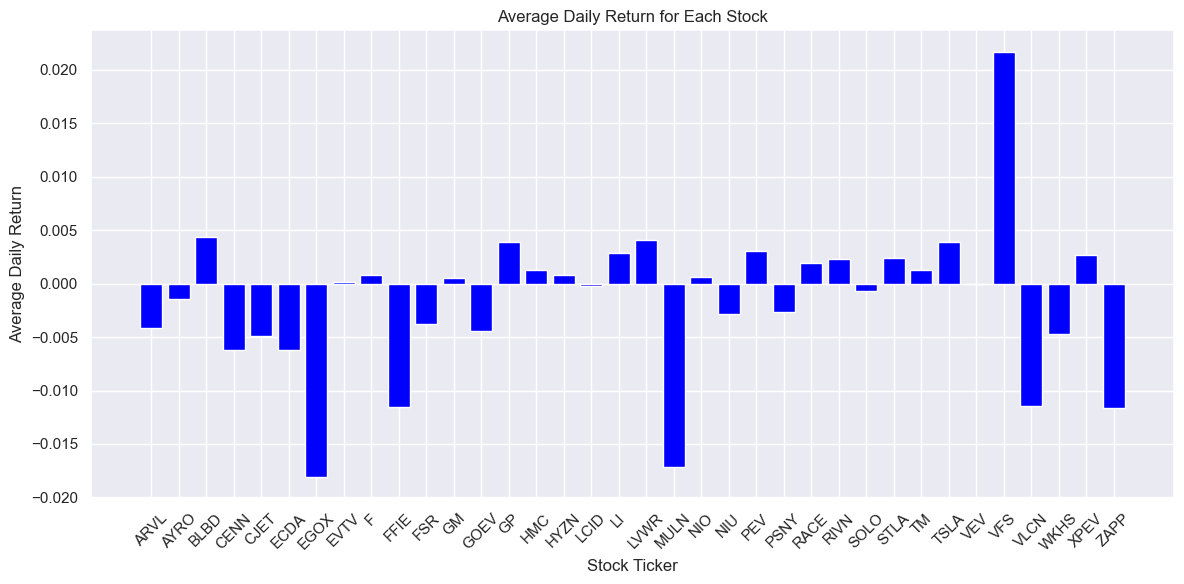

The best-performing stock is: VFS


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your combined stock data
tickers = df['Ticker'].unique()

# Initialize an empty list to store dictionaries
avg_returns_data = []

# Calculate daily returns and average daily return for each stock
for ticker in tickers:
    df_ticker = df[df['Ticker'] == ticker]
    df_ticker['Daily_Return'] = df_ticker['Adj Close'].pct_change()

    # Display average daily return for each stock
    avg_daily_return = df_ticker['Daily_Return'].mean()

    # Append values to the list as dictionaries
    avg_returns_data.append({'Ticker': ticker, 'Avg_Daily_Return': avg_daily_return})

# Create a DataFrame from the list of dictionaries
avg_returns_df = pd.DataFrame(avg_returns_data)

# Identify the stock with the highest average daily return
best_performing_stock = avg_returns_df.loc[avg_returns_df['Avg_Daily_Return'].idxmax()]['Ticker']

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(avg_returns_df['Ticker'], avg_returns_df['Avg_Daily_Return'], color='blue')
plt.xlabel('Stock Ticker')
plt.ylabel('Average Daily Return')
plt.title('Average Daily Return for Each Stock')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"The best-performing stock is: {best_performing_stock}")
